# 一. Model Representation

在给定训练集的情况下，学习函数h：X→Y，使得h（x）是y的相应值的“好”预测器。由于历史原因，这个函数h被称为假设。


![](https://ob6mci30g.qnssl.com/Blog/ArticleImage/68_0_1.png)


通过输入住房面积 x，通过学习好的函数，输出房子的估价。






------------------------------------------------------


# 二. Cost Function

代价函数是线性回归中的一个应用，在线性回归中，要解决的一个问题就是最小化问题。

假设在一元线性回归中，在一个训练集中，我们需要找到一条直线能和该训练集中的点最接近。假设直线方程为 

$$h_{\theta}(x) = \theta_{0} + \theta_{1}x$$


如何选择 $\theta_{0}$、$\theta_{1}$，使得 $h_{\theta}(x)$ 更接近于训练集 (x,y) ？

上述问题可以转换为求 $$ \rm{CostFunction} = \rm{F}({\theta_{0}},{\theta_{1}}) = \frac{1}{2m}\sum_{i = 1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^2 $$  求最小值$$\min_{{\theta_{0}} {\theta_{1}}} \rm{F}({\theta_{0},{\theta_{1}})} $$






------------------------------------------------------




# 三. Gradient Descent 梯度下降


梯度下降的主要思想：

1. 初始化 ${\theta_{0}}$ 和 ${\theta_{1}}$ , ${\theta_{0}}$ = 0 , ${\theta_{1}}$ = 0
2. 不断的改变 ${\theta_{0}}$ 和 ${\theta_{1}}$ 值，不断减少 $F({\theta_{0}},{\theta_{1}})$ 直至达到最小值（或者局部最小）。


![](https://ob6mci30g.qnssl.com/Blog/ArticleImage/68_1_0.png)


想象成下山，如何下山的速度最快？这里涉及到了下山的速度，即步长。


![](https://ob6mci30g.qnssl.com/Blog/ArticleImage/68_2_.png)

有趣的是换旁边一个点，下山，找到的最优解可能就是另一个了。这也是梯度下降的一个特点。它会找到所有的局部最优解出来。

梯度下降算法，不断更新：


\begin{align*}
\rm{temp}0 &:= {\theta_{0}} - \alpha * \frac{\partial }{\partial {\theta_{0}}}\rm{F}({\theta_{0}},{\theta_{1}}) \\
\rm{temp}1 &:= {\theta_{1}} - \alpha * \frac{\partial }{\partial {\theta_{1}}}\rm{F}({\theta_{0}},{\theta_{1}}) \\
{\theta_{0}} &:= \rm{temp}0 \\
{\theta_{1}} &:= \rm{temp}1 \\
\end{align*}

直到收敛。注意 ${\theta_{0}}$ 和 ${\theta_{1}}$ 值要**同时更新**，**切记不要求一次导更新一次！**


$\alpha$ 被称作为学习速率。


![](https://ob6mci30g.qnssl.com/Blog/ArticleImage/68_3.gif)

如果 $\alpha$ 被设置的很小，需要很多次循环才能到底最低点。
如果 $\alpha$ 被设置的很大，来来回回可能就会离最低点越来越远，**会导致无法收敛，甚至发散**。

当快要到最低点的时候，梯度下降会越来越慢，因为 $ \frac{\partial }{\partial {\theta}}$ 越来越小。

------------------------------------------------------

## 关于 梯度 和 偏导数 的关系

在上面梯度下降算法中，我们一直用的是偏导数进行讨论的，可能会有人有疑问，偏导数和梯度有啥关系？

### 1. 导数

如果是一元的，那么偏导数就降级成了求导数

$$ f^{'}(x_{0}) = \lim_{\Delta x\rightarrow 0} \frac{\Delta y}{\Delta x} = \lim_{\Delta x\rightarrow 0} \frac{f(x_{0} + \Delta x) - f(x_{0}))}{\Delta x} $$

导数的几何意义是切线在该点的斜率，物理意义是函数在这一点的 (瞬时) 变化率。

### 2. 偏导数

在来看看偏导数的定义：

$$ f_{x}(x_{0},y_{0}) = \lim_{\Delta x \rightarrow 0} \frac{f(x_{0} + \Delta x , y_{0}) - f(x_{0},y_{0})}{\Delta x} $$
$$ f_{y}(x_{0},y_{0}) = \lim_{\Delta y \rightarrow 0} \frac{f(x_{0} , y_{0} + \Delta y) - f(x_{0},y_{0})}{\Delta y} $$ 

![](https://ob6mci30g.qnssl.com/Blog/ArticleImage/68_4.png)

偏导数的几何意义也是切线的斜率，不过由于在曲面上，在一个点上与该曲面曲线相切的是一个面，就意味着切线有无数条。这里我们感兴趣的是2条切线，一个条是垂直于 y 轴（平行于 xOz 平面）的切线，另外一条是垂直于 x 轴（平行于 yOz 平面）的切线。这两条切线对应的斜率就是对 X 求偏导和对 Y 求偏导。

一个多变量函数的偏导数是它关于其中一个变量的导数，而保持其他变量恒定（相对于全导数，在其中所有变量都允许变化）。

偏导数的物理意义表示函数沿着坐标轴正方向上的变化率。



### 3. 方向导数


在说梯度之前，不应该漏掉方向导数。偏导数是求的在特定的2个方向上的导数，但是任意一个方向上也是存在导数的。这里就引入了方向导数的概念。

>设函数 u = u(x,y) 在点 $p_{0}(x_{0},y_{0})$ 的某空间临域 $ U \subset R^{2}$ 内有定义， L 为从点 $p_{0}$ 出发的射线，$p(x_{0},y_{0})$ 为 L 上且在 U 内的任一点，以 $t = \sqrt{(\Delta x)^{2} +(\Delta y)^{2} }$ 表示 $p$ 与 $p_{0}$ 之间的距离，若极限 ：

>$$ \left.\begin{matrix}
\frac{\partial f}{\partial l}
\end{matrix}\right|_{(x_{0},y_{0})} = \lim_{t \rightarrow 0^{+}} \frac{f(x_{0} + tcos \alpha , y_{0}  +   tcos \beta) - f(x_{0},y_{0})}{t}
$$

>存在，则称此极限为函数 u = u(x,y) 在点 $p_{0}$ 沿方向 L 的方向导数，记作 $ \left.\begin{matrix}
\frac{\partial f}{\partial l}
\end{matrix}\right|_{(x_{0},y_{0})}$ 。

方向导数是偏导数的概念的推广, 偏导数研究的是指定方向 (坐标轴方向) 的变化率，到了方向导数，指定的方向可以是任意方向了。

>如果函数 u = u(x,y) 在点 $p_{0}(x_{0},y_{0})$ 可微分，那么函数在该点沿任一方向 L 的方向导数存在，且有

>$$ \left.\begin{matrix}
\frac{\partial f}{\partial l}
\end{matrix}\right|_{(x_{0},y_{0})} = f_{x}(x_{0},y_{0})cos \alpha + f_{y}(x_{0},y_{0})cos \beta
$$

>其中， $cos \alpha  $ ，$cos \beta$ 是方向 L 的方向余弦。

一个标量场在某点沿着某个向量方向上的方向导数，描绘了该点附近标量场沿着该向量方向变动时的瞬时变化率。这个向量方向可以是任一方向。

方向导数的物理意义表示函数在某点沿着某一特定方向上的变化率。

### 4. 梯度

最后来讲讲梯度，梯度的定义：

>在二元函数的情形，设函数 $f(x,y)$ 在平面区域 D 内具有一阶连续偏导数，则对于每一点 $P_{0}(x_{0},y_{0}) \in D $,都可定出一个向量：

>$$ f_{x}(x_{0},y_{0}) \vec{i} + f_{y}(x_{0},y_{0}) \vec{j} $$

>这个向量称为函数 $f(x,y)$ 在点 $p_{0}(x_{0},y_{0})$ 的梯度，记作 $ \textbf{grad}\;\;f(x_{0},y_{0}) $ 或 $ \triangledown f(x_{0},y_{0}) $ , 即

>$$ \textbf{grad}\;\;f(x_{0},y_{0}) = \triangledown f(x_{0},y_{0}) = f_{x}(x_{0},y_{0}) \vec{i} + f_{y}(x_{0},y_{0}) \vec{j} $$



>其中 $ \triangledown = \frac{\partial }{\partial x} \vec{i} + \frac{\partial }{\partial y} \vec{j} $ 称为 (二维的) 向量微分算子 或者 Nabla 算子， $ \triangledown f = \frac{\partial f}{\partial x} \;\; \vec{i} + \frac{\partial f }{\partial y} \;\; \vec{j} $



如果函数 $f(x,y)$ 在点 $p_{0}(x_{0},y_{0})$ 可微分， $\vec{e_{j}} = (cos \alpha,cos \beta)$ 是与方向 L 同向的单位向量，则：

$$ 
\begin{align*}
\left.\begin{matrix}
\frac{\partial f}{\partial l}
\end{matrix}\right|_{(x_{0},y_{0})} &= f_{x}(x_{0},y_{0})cos \alpha + f_{y}(x_{0},y_{0})cos \beta \\
&= \textbf{grad}\;\;f(x_{0},y_{0}) \cdot \vec{e_{j}} = \left | \textbf{grad}\;\;f(x_{0},y_{0}) \right | cos \theta \\
\end{align*}
$$


其中 $ \theta $ 为 $ \textbf{grad}\;\;f(x_{0},y_{0}) $ 与 $ \vec{e_{j}} $ 的夹角。


1. 当 $\theta = 0 $ 的时候，$\left.\begin{matrix}
\frac{\partial f}{\partial l}
\end{matrix}\right|_{(x_{0},y_{0})}  = \left | \textbf{grad}\;\;f(x_{0},y_{0}) \right |$

即 **函数 $f(x,y)$ 在一点的梯度 $ \textbf{grad}\;\;f $ 是这样的一个向量，它的方向是函数在这点的方向导数取得最大值的方向，它的模就等于方向导数的最大值** 。

2. 当 $\theta = \pi $ 的时候，$\left.\begin{matrix}
\frac{\partial f}{\partial l}
\end{matrix}\right|_{(x_{0},y_{0})}  = - \left | \textbf{grad}\;\;f(x_{0},y_{0}) \right |$

即 $ \vec{e_{j}} $ 与 梯度 方向相反的时候，函数减少最快，在这个方向的方向导数达到最小值。


**所以梯度下降就是基于这个原理**。

函数在某一点处的方向导数在其梯度方向上达到最大值，此最大值即梯度的模数。

这就是说，沿梯度方向，函数值增加最快。同样可知，方向导数的最小值在梯度的相反方向取得，此最小值为最大值的相反数，从而沿梯度相反方向函数值的减少最快。









| 概念   | 物理意义     
| :---:   |  ---: 
| 导数   $ f^{'}(x)  $    | 函数在该点的瞬时变化率        
| 偏导数 $ \frac{\partial f(x,y) }{\partial x}  $	        | 函数在坐标轴方向上的变化率       
| 方向导数 | 函数在某点沿某个特定方向的变化率      
| 梯度  $ \textbf{grad}\;\;f(x,y)  $    | 函数在该点沿所有方向变化率最大的那个方向     

------------------------------------------------------


# 四. Linear Regression 线性回归

梯度下降是很常用的算法，它不仅被用在线性回归，还用在线性回归模型、平方误差代价函数中。

\begin{align*}
\frac{\partial }{\partial {\theta_{j}}}\rm{F}({\theta_{0}},{\theta_{1}}) & = \frac{\partial }{\partial {\theta_{j}}} \frac{1}{2m}\sum_{i = 1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^2\\
\end{align*}

令 $ z = (h_{\theta}(x^{(i)})-y^{(i)})^2$ , $ u = h_{\theta}(x^{(i)})-y^{(i)}$ , 则 $ z = u^2 $。 考虑到 $f(z)$  和 $f(u)$ 都是连续的，则有：

\begin{align*}
\frac{\partial }{\partial {\theta_{j}}}\rm{F}({\theta_{0}},{\theta_{1}}) & = \frac{\partial }{\partial {\theta_{j}}} \frac{1}{2m}\sum_{i = 1}^{m} (h_{\theta}(x^{(i)})-y^{(i)})^2\\
& = \frac{1}{2m}\sum_{i = 1}^{m} \frac{\partial z }{\partial u} \frac{\partial u }{\partial {\theta_{j}}} = \frac{1}{2m} * 2 \sum_{i = 1}^{m} u \frac{\partial u }{\partial {\theta_{j}}}\\
& = \frac{1}{m} \sum_{i = 1}^{m} u \frac{\partial u }{\partial {\theta_{j}}} \\
\end{align*}

---------------------------------------------------------------

将 u 展开 $ u = \theta_{0} + {\theta_{1}}x^{(i)}-y^{(i)}$ , 令 j = 0,则有

\begin{align*}
\frac{\partial }{\partial {\theta_{0}}}\rm{F}({\theta_{0}},{\theta_{1}}) &= \frac{1}{m} \sum_{i = 1}^{m} u \frac{\partial u }{\partial {\theta_{0}}} \\
&= \frac{1}{m} \sum_{i = 1}^{m}(\theta_{0} + \theta_{1}x^{(i)} - y^{(i)}) = \frac{1}{m} \sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) \\
\end{align*}

令 j = 1,则有

\begin{align*}
\frac{\partial }{\partial {\theta_{1}}}\rm{F}({\theta_{0}},{\theta_{1}}) &=  \frac{1}{m} \sum_{i = 1}^{m} u \frac{\partial u }{\partial {\theta_{1}}}\\
&= \frac{1}{m} \sum_{i = 1}^{m}(\theta_{0} + \theta_{1}x^{(i)} - y^{(i)}) * x^{(i)} = \frac{1}{m} \sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) * x^{(i)} \\
\end{align*}


---------------------------------------------------------------

梯度下降算法：

\begin{align*}
\rm{temp}0 &:= {\theta_{0}} - \alpha * \frac{\partial }{\partial {\theta_{0}}}\rm{F}({\theta_{0}},{\theta_{1}}) = {\theta_{0}} - \alpha * \frac{1}{m} \sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})  \\
\rm{temp}1 &:= {\theta_{1}} - \alpha * \frac{\partial }{\partial {\theta_{1}}}\rm{F}({\theta_{0}},{\theta_{1}}) = {\theta_{1}} - \alpha * \frac{1}{m} \sum_{i = 1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)}) * x^{(i)} \\
{\theta_{0}} &:= \rm{temp}0  \\
{\theta_{1}} &:= \rm{temp}1  \\
\end{align*}



当然除了用梯度下降的迭代算法，还有其他方法可以算出代价函数的最小值，比如线性代数里面的 正规方程组法。但是两者相比较而言，梯度下降适合更大的数据集。

---------------------------------------------------------------

举个例子，通过梯度下降不断更新以后，线性回归以后的曲线和原始数据集会越来越拟合。


In [93]:
import numpy as np
x_train = np.array([[2.5], [3.5], [6.3], [9.9], [9.91], [8.02],
                    [4.5], [5.5], [6.23], [7.923], [2.941], [5.02],
                    [6.34], [7.543], [7.546], [8.744], [9.674], [9.643],
                    [5.33], [5.31], [6.78], [1.01], [9.68],
                    [9.99], [3.54], [6.89], [10.9]], dtype=np.float32)

y_train = np.array([[3.34], [3.86], [5.63], [7.78], [10.6453], [8.43],
                    [4.75], [5.345], [6.546], [7.5754], [2.35654], [5.43646],
                    [6.6443], [7.64534], [7.546], [8.7457], [9.6464], [9.74643],
                    [6.32], [6.42], [6.1243], [1.088], [10.342],
                    [9.24], [4.22], [5.44], [9.33]], dtype=np.float32)

y_data = np.array([[2.5], [3.5], [6.3], [9.9], [9.91], [8.02],
                    [4.5], [5.5], [6.23], [7.923], [2.941], [5.02],
                    [6.34], [7.543], [7.546], [8.744], [9.674], [9.643],
                    [5.33], [5.31], [6.78], [1.01], [9.68],
                    [9.99], [3.54], [6.89], [10.9]], dtype=np.float32)

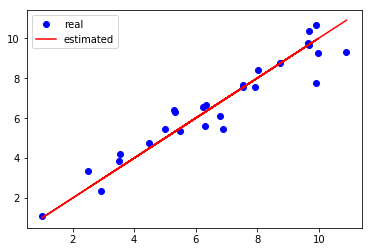

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_train, y_train, 'bo',label='real')
plt.plot(x_train, y_data, 'r-',label='estimated')
plt.legend()



------------------------------------------------------


# Linear Regression with One Variable 测试

## 1. 

Consider the problem of predicting how well a student does in her second year of college/university, given how well she did in her first year.

Specifically, let x be equal to the number of "A" grades (including A-. A and A+ grades) that a student receives in their first year of college (freshmen year). We would like to predict the value of y, which we define as the number of "A" grades they get in their second year (sophomore year).

Here each row is one training example. Recall that in linear regression, our hypothesis is hθ(x)=θ0+θ1x, and we use m to denote the number of training examples.


For the training set given above (note that this training set may also be referenced in other questions in this quiz), what is the value of m? In the box below, please enter your answer (which should be a number between 0 and 10).

解答：
4


## 2. 

Consider the following training set of m=4 training examples:

   x   	   y   
   1   	   0.5   
   2   	   1   
   4   	   2   
   0   	   0   

Consider the linear regression model hθ(x)=θ0+θ1x. What are the values of θ0 and θ1 that you would expect to obtain upon running gradient descent on this model? (Linear regression will be able to fit this data perfectly.)


θ0=0,θ1=0.5

θ0=1,θ1=1

θ0=0.5,θ1=0.5

θ0=1,θ1=0.5

θ0=0.5,θ1=0

解答：
θ0=0,θ1=0.5



## 3. 

Suppose we set θ0=−1,θ1=2 in the linear regression hypothesis from Q1. What is hθ(6)?

解答：
-1 + 2*6 = 11


## 4. 

Let f be some function so that
f(θ0,θ1) outputs a number. For this problem,
f is some arbitrary/unknown smooth function (not necessarily the
cost function of linear regression, so f may have local optima).
Suppose we use gradient descent to try to minimize f(θ0,θ1)
as a function of θ0 and θ1. Which of the
following statements are true? (Check all that apply.)


A. No matter how θ0 and θ1 are initialized, so long
as α is sufficiently small, we can safely expect gradient descent to converge
to the same solution.


B. If the first few iterations of gradient descent cause f(θ0,θ1) to
increase rather than decrease, then the most likely cause is that we have set the
learning rate α to too large a value.


C. If θ0 and θ1 are initialized at
the global minimum, then one iteration will not change their values.


D. Setting the learning rate α to be very small is not harmful, and can
only speed up the convergence of gradient descent.


解答：
B、C


## 5. 

Suppose that for some linear regression problem (say, predicting housing prices as in the lecture), we have some training set, and for our training set we managed to find some θ0, θ1 such that J(θ0,θ1)=0.

Which of the statements below must then be true? (Check all that apply.)

A. For this to be true, we must have θ0=0 and θ1=0
so that hθ(x)=0

B. We can perfectly predict the value of y even for new examples that we have not yet seen.
(e.g., we can perfectly predict prices of even new houses that we have not yet seen.)


C. For these values of θ0 and θ1 that satisfy J(θ0,θ1)=0,
we have that hθ(x(i))=y(i) for every training example (x(i),y(i))

D. This is not possible: By the definition of J(θ0,θ1), it is not possible for there to exist
θ0 and θ1 so that J(θ0,θ1)=0

解答：
C

> GitHub Repo：[Halfrost-Field](https://github.com/halfrost/Halfrost-Field)
> 
> Follow: [halfrost · GitHub](https://github.com/halfrost)
>
> Source: [https://github.com/halfrost/Halfrost-Field/blob/master/contents/Machine\_Learning/Gradient\_descent.ipynb](https://github.com/halfrost/Halfrost-Field/blob/master/contents/Machine_Learning/Gradient_descent.ipynb)